In [ ]:
# %pip install tensorflow
# %pip install pandas
# %pip install keras
# %pip install matplotlib
# %pip install scikit-learn
# %pip install keras

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print ('Number of Rows :', df.shape[0])
print ('Number of Columns :', df.shape[1])
print ('Number of Patients with outcome 1 :', df.Outcome.sum())
print ('Event Rate :', round(df.Outcome.mean()*100,2) ,'%')

Number of Rows : 768
Number of Columns : 9
Number of Patients with outcome 1 : 268
Event Rate : 34.9 %


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:

X = df.to_numpy()[:,0:8]
Y = df.to_numpy()[:,8]
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = seed)
print (f'Shape of Train Data : {X_train.shape}')
print (f'Shape of Test Data : {X_test.shape}')

Shape of Train Data : (576, 8)
Shape of Test Data : (192, 8)


In [ ]:

model = Sequential([
    Dense(24, input_dim = (8), activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                216       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 529 (2.07 KB)
Trainable params: 529 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose = 1)

Epoch 1/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.7778
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.7917
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.7934
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.8090
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.7882
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7917
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.7934
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8160
Epoch 9/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8125
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8003
Epoch 11/

In [ ]:
scores = model.evaluate(X_test, y_test)
print (f'{model.metrics_names[1]} : {round(scores[1]*100, 2)} %')

6/6 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.7240
accuracy : 72.4 %


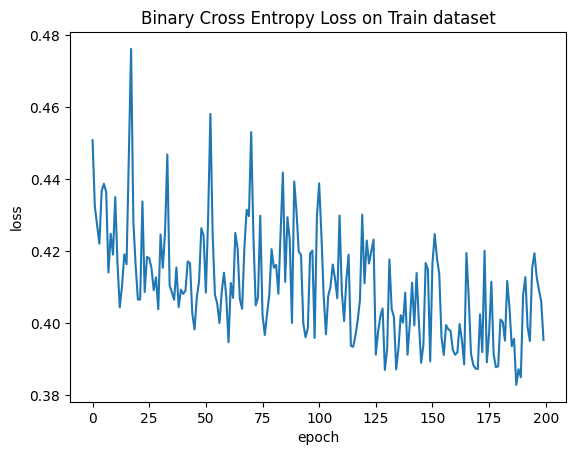

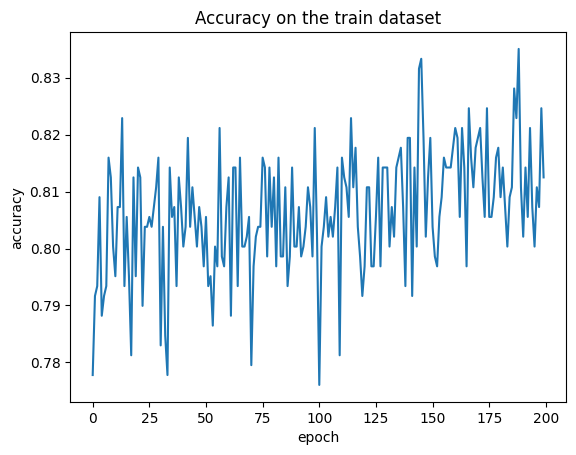

In [ ]:

# Plotting loss
plt.plot(history.history['loss'])
plt.title('Binary Cross Entropy Loss on Train dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Plotting accuracy metric
plt.plot(history.history['accuracy'])
plt.title('Accuracy on the train dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()